## Modeling the prices of Car using Linear Regression

### Business Goal :

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
- Model the price of cars with the available independent variables.
- Used by the management to understand how exactly the prices vary with the independent variables. 
- Company will accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
- The model will be a good way for management to understand the pricing dynamics of a new market

### Setp 1: Loading data into DataFrame

In [85]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from spellchecker import SpellChecker

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [86]:
# Creating dataframe from the provided dataset

carPrices_df = pd.read_csv('CarPrice_Assignment.csv')

# Creating copy of the dataframe
carPrices_Values_DF = carPrices_df
# Creating "Company Name" column which will contain company name only
# Derived by splitting "CarName" column on "White Space"

carPrices_df["CompanyName"]= carPrices_df.CarName.str.split().str.get(0)
carPrices_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [87]:
# Inspecting various aspects of the dataset

carPrices_df.info()

# No null values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [88]:
carPrices_df.shape

(205, 27)

In [89]:
#Drop "car_ID" column as it is defining serial numbers and not contributing to the model values
carPrices_df.drop(['car_ID'], axis = 1, inplace = True)

In [90]:
carPrices_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [91]:
#Collecting all the numeric variables
num_vars = [var for var in carPrices_df.columns if carPrices_df[var].dtypes != 'O']
num_vars

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

### Step 2: Visualising the Data

#### Visualising Numeric Variables

- making a pairplot of all the numeric variables

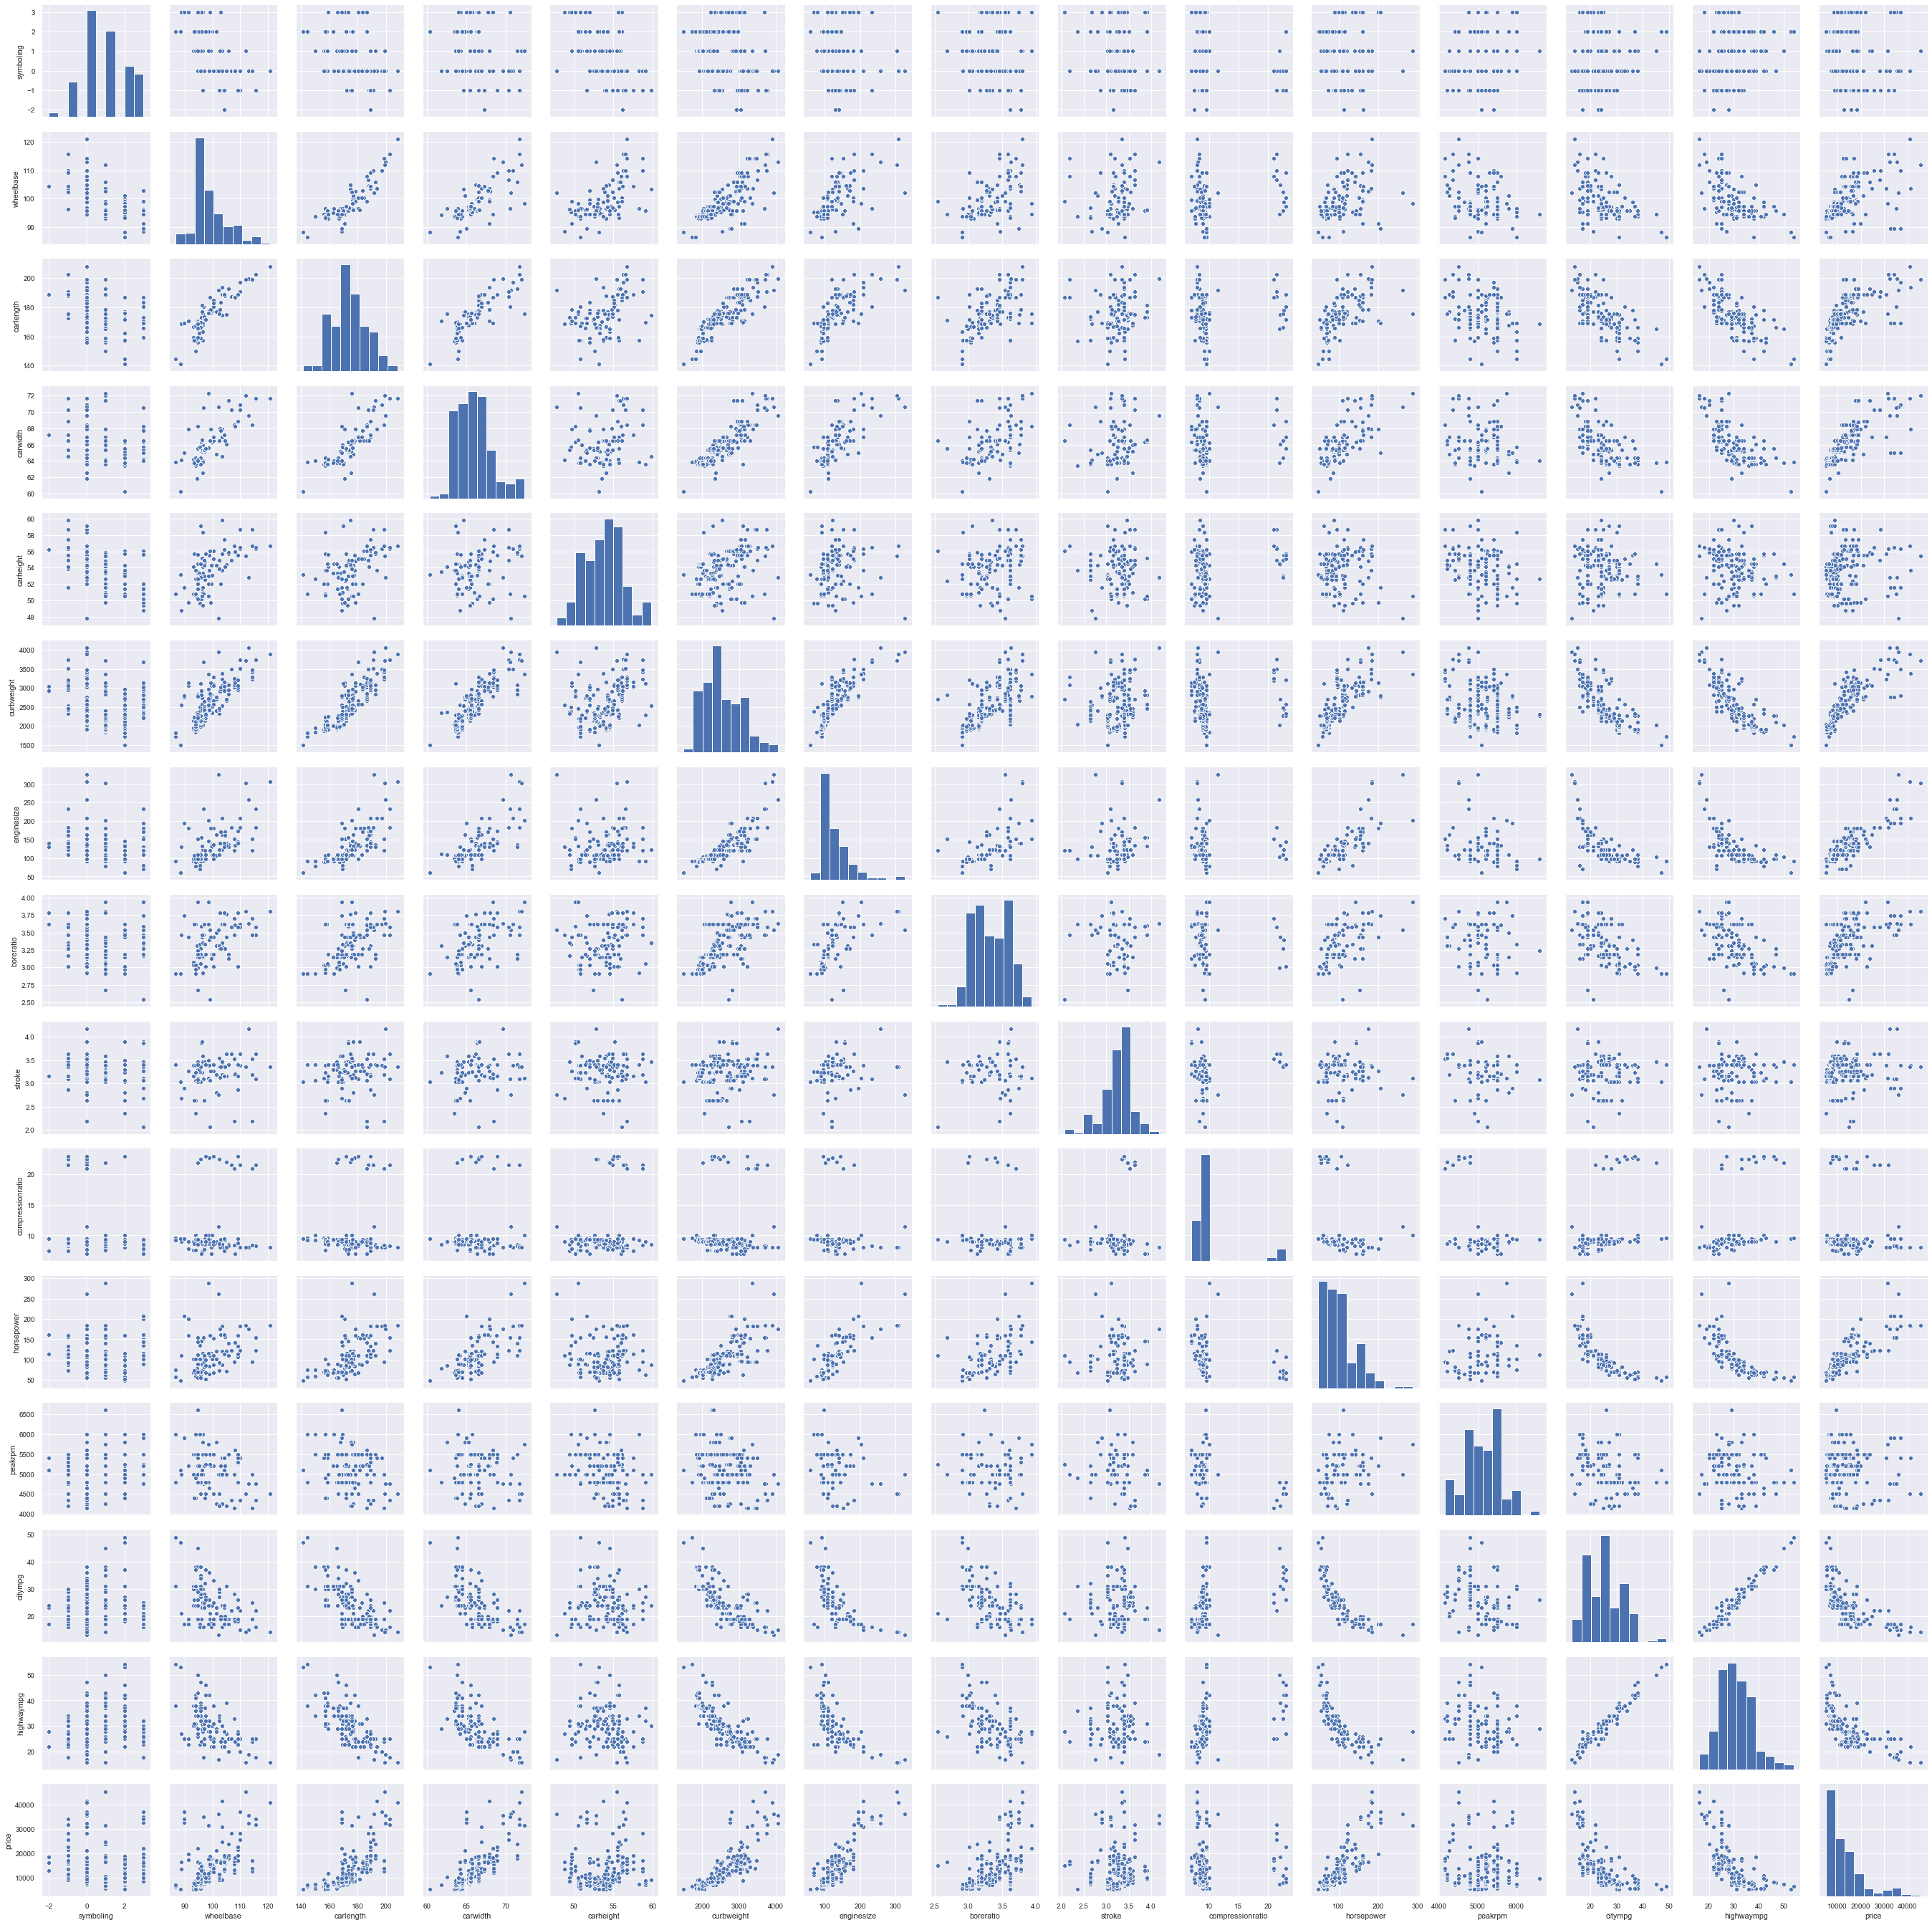

In [92]:
# Pairplot will take some time to load all the graphs.
sns.pairplot(carPrices_df)
plt.show()

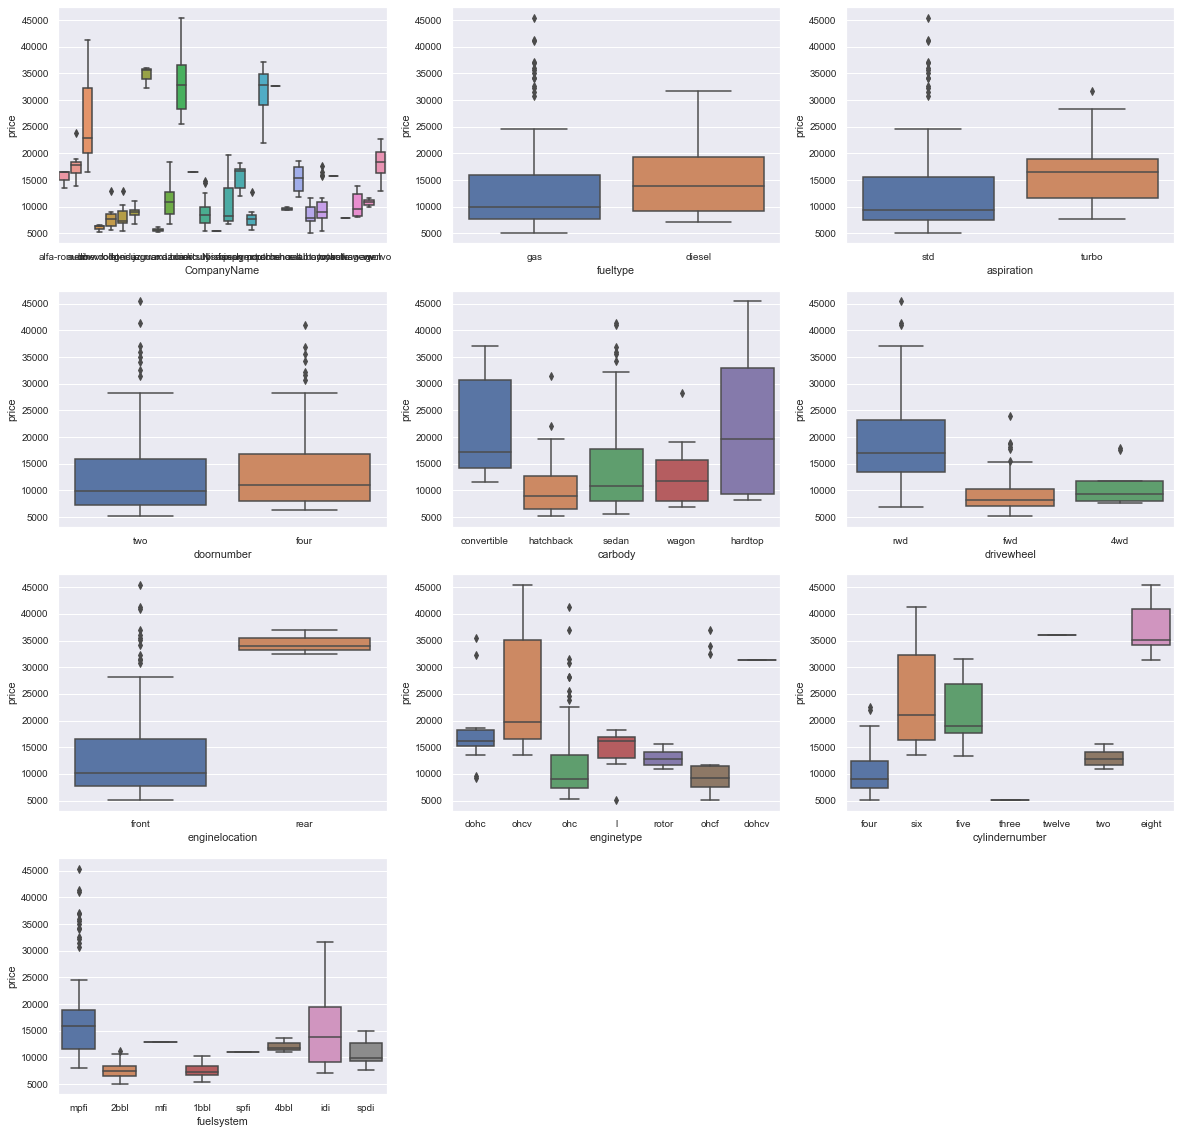

In [93]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'CompanyName', y = 'price', data = carPrices_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carPrices_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carPrices_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carPrices_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carPrices_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carPrices_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carPrices_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carPrices_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carPrices_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carPrices_df)


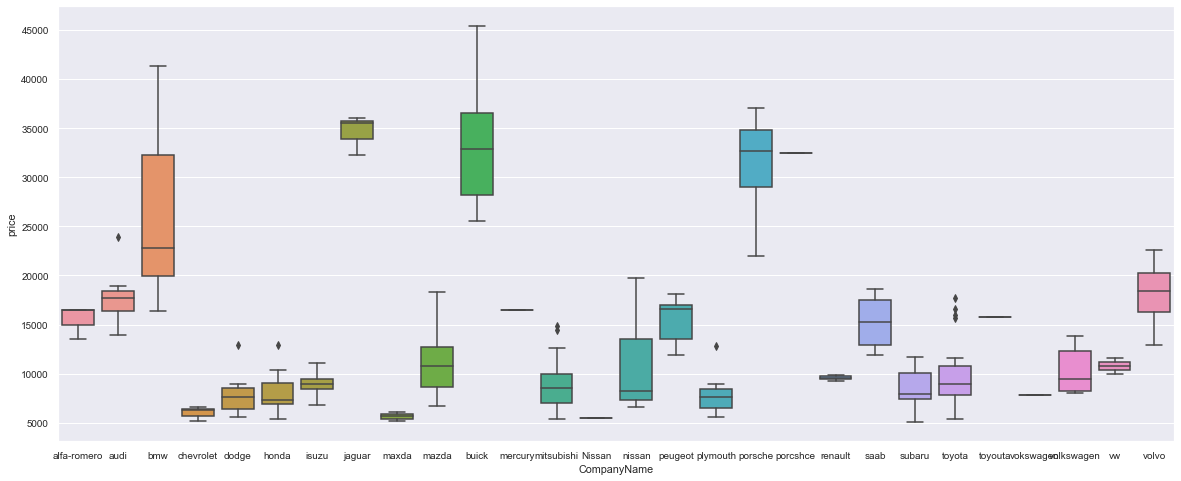

In [94]:
plt.figure(figsize=(20,8))
sns.boxplot(x = 'CompanyName', y = 'price', data = carPrices_df)

plt.show()

### Step 3: Data Preparation

None of the variables are of "Yes/No' type.
The categorical variables are having 2 or more levels. These also needs to be converted into integer values.
Hence using `Dummy Variables`. 

In [95]:
# Checking unique values from "CompanyName" column to make sure that data is correct
carPrices_df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [96]:
# Here we can see that "Mazda" and "Maxda", "vokswagen","volkswagen","vw" are same values.
# Changing the company names to the correct company names
carPrices_df["CompanyName"].replace("maxda","mazda",inplace=True)
carPrices_df["CompanyName"].replace("toyouta","toyota",inplace=True)
carPrices_df["CompanyName"].replace("vokswagen","volkswagen",inplace=True)
carPrices_df["CompanyName"].replace("vw","volkswagen",inplace=True)
carPrices_df["CompanyName"].replace("porcshce","porsche",inplace=True)
carPrices_df["CompanyName"].replace("Nissan","nissan",inplace=True)
carPrices_df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [97]:
# Create dummy variables for "Company Name" Categorical variable
dummyCompanyName_DF = pd.get_dummies(carPrices_df['CompanyName'])
dummyCompanyName_DF.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
# Now we can describe "alfa-romero" Car Company can be described using other 21 columns.
# Hence dropping the "alfa-romero" column.
dummyCompanyName_DF = pd.get_dummies(carPrices_df[['CompanyName']], drop_first = True)
dummyCompanyName_DF.head()

,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# Describing "fueltype" using Column "gas" only
dummyFuetType_DF = pd.get_dummies(carPrices_df[['fueltype']], drop_first = True)
#dummyFuetType_DF.head()

# Describing "aspiration" using Column "turbo" only
dummyAspiration_DF = pd.get_dummies(carPrices_df[['aspiration']], drop_first = True)
#dummyAspiration_DF.head()

# Describing "doorNumber" using Column "two" only
dummyDoorNumber_DF = pd.get_dummies(carPrices_df[['doornumber']], drop_first = True)
#dummyDoorNumber_DF.head()

# Describing "drivewheel" using Column "fwd" and "rwd" only 
dummyDriveWheel_DF = pd.get_dummies(carPrices_df[['drivewheel']], drop_first = True)
#dummyDriveWheel_DF.head()

# Describing "enginelocation" using Column "rear" only 
dummyEngineLocation_DF = pd.get_dummies(carPrices_df[['enginelocation']], drop_first = True)
#dummyEngineLocation_DF.head()

# Describing "enginetype" : dropping " dohc" as it can be described using other columns
dummyEngineType_DF = pd.get_dummies(carPrices_df[['enginetype']], drop_first = True)
#dummyEngineType_DF.head()

# Describing "cylindernumber" : dropping column "five" as it can be described using other columns
dummyCylinderNumber_DF = pd.get_dummies(carPrices_df[['cylindernumber']], drop_first = True)
#dummyCylinderNumber_DF.head()

# Describing "fuelsystem" : dropping column "2bbl" as it can be described using other columns
dummyFuelSystem_DF = pd.get_dummies(carPrices_df[['fuelsystem']], drop_first = True)
#dummyFuelSystem_DF.head()

In [100]:
carPrices_df = pd.concat([carPrices_df, dummyCompanyName_DF, dummyFuetType_DF, dummyAspiration_DF,
                          dummyDoorNumber_DF, dummyDriveWheel_DF, dummyEngineLocation_DF,
                          dummyEngineType_DF,dummyCylinderNumber_DF,dummyFuelSystem_DF], axis = 1)

In [101]:
carPrices_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
carPrices_df.drop(['CompanyName','CarName','fueltype','aspiration','doornumber','carbody','drivewheel',
                  'enginelocation','enginetype','cylindernumber','fuelsystem'],axis = 1, inplace = True)
carPrices_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [103]:
carPrices_df.shape

(205, 61)

### Step 4: Splitting the Data into Training and Testing Sets

In [104]:
# 70% Training data and 30% Testing Data
df_train, df_test = train_test_split(carPrices_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
using MinMax scaling.

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [107]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

### Step 5: Building model

Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [108]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [109]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 48),
 ('wheelbase', False, 13),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 23),
 ('horsepower', False, 8),
 ('peakrpm', False, 10),
 ('citympg', False, 26),
 ('highwaympg', False, 25),
 ('CompanyName_audi', False, 32),
 ('CompanyName_bmw', True, 1),
 ('CompanyName_buick', False, 31),
 ('CompanyName_chevrolet', False, 34),
 ('CompanyName_dodge', False, 17),
 ('CompanyName_honda', False, 20),
 ('CompanyName_isuzu', False, 40),
 ('CompanyName_jaguar', False, 28),
 ('CompanyName_mazda', False, 41),
 ('CompanyName_mercury', False, 47),
 ('CompanyName_mitsubishi', False, 9),
 ('CompanyName_nissan', False, 44),
 ('CompanyName_peugeot', False, 6),
 ('CompanyName_plymouth', False, 16),
 ('CompanyName_porsche', True, 1),
 ('CompanyName_renault', False, 29),
 ('CompanyName_saab', False, 14),
 ('CompanyName_subaru'

In [110]:
# Features those are selected using RFE
selectedFeatures = X_train.columns[rfe.support_]
selectedFeatures

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'CompanyName_bmw',
       'CompanyName_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [111]:
# Features those are eliminated using RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'CompanyName_audi', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan', 'CompanyName_peugeot',
       'CompanyName_plymouth', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
  

### Building model using statsmodel, for the detailed statistics

### Model 1:

In [112]:
# Creating X_test dataframe with RFE selected variables
X_train_model1 = X_train[selectedFeatures]

In [113]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model1 = sm.add_constant(X_train_model1)
lm = sm.OLS(y_train,X_train_model1).fit()   # Running the linear model

#Let's see the summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.21e-64
Time:                        19:13:52   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [114]:
# Calculate the VIFs for the model1 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.19
2,curbweight,9.26
3,enginesize,7.23
1,carwidth,4.92
4,boreratio,1.85
6,CompanyName_porsche,1.82
7,enginelocation_rear,1.66
9,cylindernumber_twelve,1.49
10,cylindernumber_two,1.24
5,CompanyName_bmw,1.13


### Model 2:

The "p-value" of "cylindernumber_twelve" is 0.511 which is more than threshold which is considered to be 0.005. 
Hence dropping the column and building the Model 2.

In [115]:
X_train_model2 = X_train_model1.drop(["cylindernumber_twelve"], axis = 1)

In [116]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model2 = sm.add_constant(X_train_model2)
lm = sm.OLS(y_train,X_train_model2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.18e-65
Time:                        19:13:54   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

After dropping the "cylindernumber_twelve" column and rebuilding the model, the R^2 value is not changed.

In [117]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.15
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
6,CompanyName_porsche,1.80
7,enginelocation_rear,1.65
9,cylindernumber_two,1.17
5,CompanyName_bmw,1.09
8,cylindernumber_three,1.05


### Model 3:

VIF for the "curbweight" is 8.64 which is more than 5 and not accepted.
Hence dropping the column and rebuilding the model.

In [118]:
X_train_model3 = X_train_model2.drop(["curbweight"], axis = 1)

In [119]:
# Adding a constant variable 
X_train_model3 = sm.add_constant(X_train_model3)
lm = sm.OLS(y_train,X_train_model3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.01e-63
Time:                        19:13:55   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
5,CompanyName_porsche,1.67
6,enginelocation_rear,1.64
8,cylindernumber_two,1.14
4,CompanyName_bmw,1.09
7,cylindernumber_three,1.05


After building the 'Model 3' and calculating the VIF, we can see that the VIF value for the selected features is less than 5 which is optimal condition.

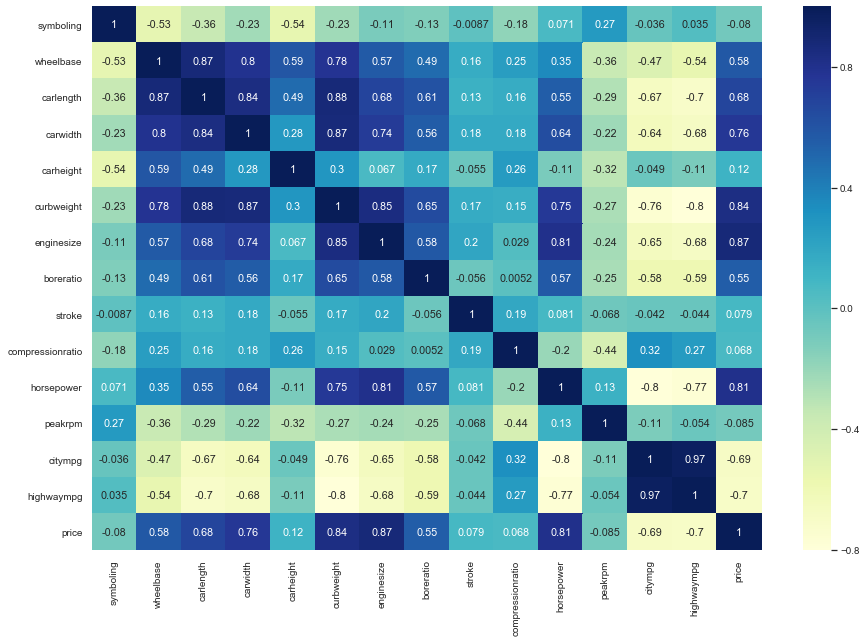

In [121]:
plt.figure(figsize = (15,10))
sns.heatmap(carPrices_Values_DF.corr(), cmap = "YlGnBu",annot = True)
sns.set(font_scale = 0.9)
plt.show()

### Model 4:

From the above heatmap for Correlation of feture "Price" with other columns, we can see that feature "Horsepower" is correlated with "Price" with a correlation coeffiecient value 0.81.

Hence introducing the feature "Horsepower" in the Model 4.

In [122]:
X_train_model3 = X_train_model3.drop(['const'], axis=1)

In [123]:
selectedFeatures = X_train_model3.columns
selectedFeatures = selectedFeatures.insert(1,'horsepower')

In [124]:
# Creating X_test dataframe with RFE selected variables
X_train_model4 = X_train[selectedFeatures]

In [125]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model4 = sm.add_constant(X_train_model4)
lm = sm.OLS(y_train,X_train_model4).fit()   # Running the linear model

#Let's see the summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.42e-62
Time:                        19:13:59   Log-Likelihood:                 182.96
No. Observations:                 143   AIC:                            -345.9
Df Residuals:                     133   BIC:                            -316.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1775 

In [126]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.44
3,enginesize,5.71
2,horsepower,4.45
1,carwidth,3.10
6,CompanyName_porsche,1.99
4,boreratio,1.70
7,enginelocation_rear,1.64
9,cylindernumber_two,1.32
5,CompanyName_bmw,1.10
8,cylindernumber_three,1.05


The R^value of the Model 4 after introducing feature "Horsepower" is 0.902 and the VIF value of the features goes beyond 5.

The updated R^2 value for Model 4 (0.902) is nearly same with the Model 3 (0.901)

Hence, for final value prediction, Model 3 can be used.


### Recreating Model 3

In [127]:
X_train_model_3 = X_train_model4.drop(['const'], axis=1)

In [128]:
X_train_model_3 = X_train_model4.drop(['horsepower'], axis=1)

In [129]:
# Adding a constant variable 
X_train_model_3 = sm.add_constant(X_train_model_3)
lm = sm.OLS(y_train,X_train_model_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.01e-63
Time:                        19:14:01   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_model_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.43
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
5,CompanyName_porsche,1.67
6,enginelocation_rear,1.64
8,cylindernumber_two,1.14
4,CompanyName_bmw,1.09
7,cylindernumber_three,1.05


In `Model 3`, `VIF` is under `5`.

`p-values` are 0.

Hence using this model for `Predictions`.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [131]:
y_train_price = lm.predict(X_train_model_3)

Text(0.5, 0, 'Errors')

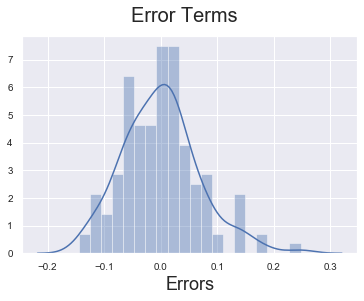

In [132]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 6:  Making Predictions

#### Dividing into X_test and y_test

In [133]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,0.265306,0.341732,0.200000,0.346154,0.132148,0.082969,0.515873,0.524590,0.12500,0.116129,0.265306,1.000000,1.000000,0.058474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.8,0.311953,0.426772,0.315789,0.605769,0.219125,0.131004,0.515873,0.726776,0.12500,0.212903,0.448980,0.541667,0.580645,0.077398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,0.6,0.355685,0.522835,0.421053,0.413462,0.271985,0.187773,0.674603,0.721311,0.10000,0.206452,0.265306,0.500000,0.516129,0.086148,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165,0.6,0.230321,0.379528,0.157895,0.307692,0.214320,0.082969,0.555556,0.551913,0.15000,0.387097,1.000000,0.500000,0.419355,0.097473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
140,0.8,0.195335,0.200000,0.136842,0.605769,0.202307,0.126638,0.857143,0.311475,0.10625,0.135484,0.102041,0.500000,0.483871,0.055099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [134]:
y_test = df_test.pop('price')
X_test = df_test

In [135]:
X_train_model_3 = X_train_model_3.drop(['const'], axis=1)

In [136]:
selectedFeatures = X_train_model_3.columns
selectedFeatures

Index(['carwidth', 'enginesize', 'boreratio', 'CompanyName_bmw',
       'CompanyName_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_two'],
      dtype='object')

In [137]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[selectedFeatures]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [138]:
X_test_new.head()

,const,carwidth,enginesize,boreratio,CompanyName_bmw,CompanyName_porsche,enginelocation_rear,cylindernumber_three,cylindernumber_two
160,1.0,0.200000,0.082969,0.515873,0,0,0,0,0
186,1.0,0.315789,0.131004,0.515873,0,0,0,0,0
59,1.0,0.421053,0.187773,0.674603,0,0,0,0,0
165,1.0,0.157895,0.082969,0.555556,0,0,0,0,0
140,1.0,0.136842,0.126638,0.857143,0,0,0,0,0


In [139]:
selectedFeatures

Index(['carwidth', 'enginesize', 'boreratio', 'CompanyName_bmw',
       'CompanyName_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_two'],
      dtype='object')

In [140]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

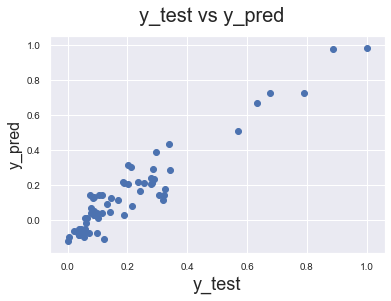

In [141]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [142]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7960746040833434

Here we get the R^2 value as 79.60 % for the Test Model.

This gives the company idea to look into the features those gave this model.

While designing the new car, the company should reffer the 
- car models such as 
 - BMW
 - Porsche

- Engine Locations
- Cylinder Numbers
- Car Width
- Engine Size
- Bore Ratio 

to design the perfect car model to be released in US.